# Algerian Forest Fires Dataset Data Set

Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Exploratory data analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Choose best model

### 1. Problem Statement
- The dataset includes data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria. 
- User need to draw/give assumption/prediction that Algeria Forest will catch up fire or not based on input data.
- Presdiction result can be used to take corrective action or prevent the mishap.

### 2. Data Collection
- This data set collected from UCI Machine Learning Repository (Website).
- The dataset includes  columns and 244 rows 

### 2.1 Import data and import module

Importing pandas, numpy, seaborn, warnings, matplotlib library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import plotly.express as px
from six.moves import urllib

%matplotlib inline
warnings.filterwarnings('ignore')

### Download and import csv data as DataFrame

In [234]:
import os

download_dir = "./data/"
download_url = "https://raw.githubusercontent.com/saisubhasish/datasets/main/Algerian_forest_fires_dataset_UPDATE.csv"

os.makedirs(download_dir, exist_ok=True)
filename = os.path.basename(download_url)

download_file_path = os.path.join(download_dir, filename)

urllib.request.urlretrieve(download_url, download_file_path)

# Converting to dataframe by ignoring first row 
df = pd.read_csv(download_file_path, header=[1])

### Top 5 rows

In [235]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


### 3. Data Cleaning

In [236]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


### Dropping row : 122,123

Removing un-necessary columns

In [237]:
# df.drop([122,123], axis=0, inplace=True)

df_new = df.drop([122,123], axis=0)

# Resetting the index value
df_new.reset_index(inplace=True)

In [238]:
df_new

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


Adding a new feature as "Region" for 'Bejaia' and 'Sidi-Bel Abbes'

In [239]:
df_new.loc[:122, 'Region'] = 'Bejaia'
df_new.loc[122:, 'Region'] = 'Sidi-Bel Abbes'

In [240]:
df_new

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
241,243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


In [241]:
# Column names

df_new.columns

Index(['index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [242]:
# Striping the column names

df_new.columns = [col.strip() for col in df_new.columns ]
df_new.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

Summary of data

Check datatypes of Dataset

In [243]:
df_new.dtypes

index           int64
day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region         object
dtype: object

In [244]:
df_new.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia


#### Finding unique values of a feature

In [245]:
df_new['DC'].unique()

array(['7.6', '7.1', '6.9', '14.2', '22.2', '30.5', '38.3', '38.8',
       '46.3', '54.3', '61.4', '17', '7.8', '7.4', '8', '16', '27.1',
       '31.6', '39.5', '47.7', '55.8', '63.8', '71.8', '80.3', '88.5',
       '84.4', '92.8', '8.6', '8.3', '9.2', '18.5', '27.9', '37', '40.4',
       '49.8', '9.3', '18.7', '27.7', '37.2', '22.9', '25.5', '34.1',
       '43.1', '52.8', '62.1', '71.5', '79.9', '71.3', '79.7', '88.7',
       '98.6', '108.5', '117.8', '127', '136', '145.7', '10.2', '10',
       '19.8', '29.7', '39.1', '48.6', '47', '57', '67', '77', '75.1',
       '85.1', '94.7', '92.5', '90.4', '100.7', '110.9', '120.9', '130.6',
       '141.1', '151.3', '161.5', '171.3', '181.3', '190.6', '200.2',
       '210.4', '220.4', '180.4', '8.7', '7.5', '7', '15.7', '24', '32.2',
       '30.1', '8.4', '8.9', '16.6', '7.3', '24.3', '33.1', '41.3',
       '49.3', '57.9', '41.4', '30.4', '15.2', '7.7', '16.3', '24.9',
       '8.8', '8.2', '15.4', '17.6', '26.3', '28.9', '14.7', '22.5',
       '

In [246]:
# Handling value '14.6 9' in the feature DC

df_new['DC'] = df_new['DC'].str.split(' ').str[0]

In [247]:
df_new['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '7.1 ', '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6',
       '15', '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8',
       '0.6', '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1',
       '1.3', '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6',
       '9.9', '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1',
       '17.2', '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7',
       '13.2', '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1',
       '1', '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire   ', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5',

In [248]:
# Handling value 'fire' in column 'FWI'

df_new['FWI'] = df_new['FWI'].str.replace('fire','0')

In [249]:
df_new['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '7.1 ', '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6',
       '15', '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8',
       '0.6', '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1',
       '1.3', '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6',
       '9.9', '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1',
       '17.2', '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7',
       '13.2', '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1',
       '1', '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', '0   ', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5', '1

Handling the values of 'Classes' column

In [250]:
df_new['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [251]:
df_new['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [252]:
# Removing the space from the values

df_new['Classes'] = df_new['Classes'].str.strip()

In [253]:
df_new['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

Checking null values

In [254]:
df_new.isnull().sum()

index          0
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

Observation :
- There is only one null value in 'Classes' feature

In [255]:
# Finding the null values

df_new['Classes'].isnull().sum()

1

In [256]:
df_new['Classes'].mode()[0]

'fire'

In [257]:
df_new['Classes'] = df_new['Classes'].fillna(df_new['Classes'].mode()[0])

In [258]:
df_new.isnull().sum()

index          0
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

Observation :
- Now we have Zero null values

### Converting the datatypes of features

In [259]:
df_new['day'] = df_new['day'].astype(int)
df_new['month'] = df_new['month'].astype(int)
df_new['year'] = df_new['year'].astype(int)
df_new['Temperature'] = df_new['Temperature'].astype(float)
df_new['RH'] = df_new['RH'].astype(int)
df_new['Ws'] = df_new['Ws'].astype(int)
df_new['Rain'] = df_new['Rain'].astype(float, "%. 2f")
df_new['FFMC'] = df_new['FFMC'].astype(float, 2)
df_new['DMC'] = df_new['DMC'].astype(float, 2)
df_new['ISI'] = df_new['ISI'].astype(float, 2)
df_new['BUI'] = df_new['BUI'].astype(float, 2)

In [260]:
# Replacing unnecessary features day, month & year with a new feature 'Date'

df_new['date'] = pd.to_datetime(df_new[['day', 'month', 'year']])
df_new.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [261]:
df_new

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,0,29.0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia,2012-06-01
1,1,29.0,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia,2012-06-02
2,2,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia,2012-06-03
3,3,25.0,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia,2012-06-04
4,4,27.0,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,241,30.0,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes,2012-09-26
240,242,28.0,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes,2012-09-27
241,243,27.0,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes,2012-09-28
242,244,24.0,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes,2012-09-29


## 4. Exploring DataSet
Data profiling

In [262]:
# Checking Shape of data

df_new.shape

(244, 14)

Observation:
- There are 13 columns and 244 rows in this dataframe

Columns of the dataset

In [263]:
df_new.columns

Index(['index', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'BUI', 'FWI', 'Classes', 'Region', 'date'],
      dtype='object')

Rows of the dataset

In [264]:
df_new.index

RangeIndex(start=0, stop=244, step=1)

Check the null/missing values of the dataset

#### 4.1 Check the basic information of the dataset

In [265]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        244 non-null    int64         
 1   Temperature  244 non-null    float64       
 2   RH           244 non-null    int32         
 3   Ws           244 non-null    int32         
 4   Rain         244 non-null    float64       
 5   FFMC         244 non-null    float64       
 6   DMC          244 non-null    float64       
 7   DC           244 non-null    object        
 8   ISI          244 non-null    float64       
 9   BUI          244 non-null    float64       
 10  FWI          244 non-null    object        
 11  Classes      244 non-null    object        
 12  Region       244 non-null    object        
 13  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int32(2), int64(1), object(4)
memory usage: 24.9+ KB


Obseravtion :
- There are 244 rows and 13 columns are there
- There is no Null value in the dataset
- The columns datatypes are of 4 types (float, int, object & datetime)
- For float64: 8 columns, int 32: 2 columns, object: 2 columns, datetime: 1 columns
- Total Memory usage: 32.9+ KB

#### Summary of the data   

In [266]:
# Display summary statistics of DataFrame

df_new.describe()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,122.500000,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754
std,71.450492,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824
min,0.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000
25%,60.750000,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000
50%,122.500000,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000
75%,184.250000,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000
max,245.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000


Numerical and categorical features

In [267]:
# Define the numerical and Categorical columns

col_num = [feature for feature in df_new.columns if df_new[feature].dtypes != 'object']
col_cat = [feature for feature in df_new.columns if df_new[feature].dtypes == 'object']

In [268]:
print('We have {} numerical features : {}'.format(len(col_num), col_num))
print('We have {} categorical features : {}'.format(len(col_cat), col_cat))

We have 10 numerical features : ['index', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI', 'date']
We have 4 categorical features : ['DC', 'FWI', 'Classes', 'Region']


In [269]:
# Propertion of count data on categorical columns

for col in col_cat:
    print(df_new[col].value_counts(normalize=True)*100)
    print('------------------------------------------')

8       2.049180
8.2     1.639344
8.4     1.639344
7.6     1.639344
7.5     1.639344
          ...   
98.6    0.409836
44.5    0.409836
96.8    0.409836
52.8    0.409836
76.4    0.409836
Name: DC, Length: 198, dtype: float64
------------------------------------------
0.4     4.918033
0.8     4.098361
0.1     3.688525
0.5     3.688525
0       3.688525
          ...   
10      0.409836
12.1    0.409836
8.4     0.409836
2.7     0.409836
17.3    0.409836
Name: FWI, Length: 127, dtype: float64
------------------------------------------
fire        56.557377
not fire    43.442623
Name: Classes, dtype: float64
------------------------------------------
Sidi-Bel Abbes    50.0
Bejaia            50.0
Name: Region, dtype: float64
------------------------------------------


Converting the output variable to numeric 

In [270]:
df_new['Classes'] = df_new['Classes'].map({'not fire' : 0 , 'fire' : 1 })

Converting the Region feature value to numeric

In [271]:
df_new['Region'] = df_new['Region'].map({'Bejaia':1, 'Sidi-Bel Abbes':0})

In [272]:
df_new[col_num]

,index,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,date
0,0,29.0,57,18,0.0,65.7,3.4,1.3,3.4,2012-06-01
1,1,29.0,61,13,1.3,64.4,4.1,1.0,3.9,2012-06-02
2,2,26.0,82,22,13.1,47.1,2.5,0.3,2.7,2012-06-03
3,3,25.0,89,13,2.5,28.6,1.3,0.0,1.7,2012-06-04
4,4,27.0,77,16,0.0,64.8,3.0,1.2,3.9,2012-06-05
...,...,...,...,...,...,...,...,...,...,...
239,241,30.0,65,14,0.0,85.4,16.0,4.5,16.9,2012-09-26
240,242,28.0,87,15,4.4,41.1,6.5,0.1,6.2,2012-09-27
241,243,27.0,87,29,0.5,45.9,3.5,0.4,3.4,2012-09-28
242,244,24.0,54,18,0.1,79.7,4.3,1.7,5.1,2012-09-29


Checking the memory usage by features

In [273]:
df_new.memory_usage()

Index           128
index          1952
Temperature    1952
RH              976
Ws              976
Rain           1952
FFMC           1952
DMC            1952
DC             1952
ISI            1952
BUI            1952
FWI            1952
Classes        1952
Region         1952
date           1952
dtype: int64

### Feature Information



- Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

##### Weather data observations
- Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42     
- RH : Relative Humidity in %: 21 to 90   (Relative humidity (RH) is a measure of how much moisture is in the air)
- Ws :Wind speed in km/h: 6 to 29   (wind speed)
- Rain: total day in mm: 0 to 16.8    (Rain in a day in mm)

##### FWI(Fire Weather Index) Components
- Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5   (numerical rating of the moisture content of litter and cured fine fuels)
- Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9   (The Duff Moisture Code (DMC) is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth)
- Drought Code (DC) index from the FWI system: 7 to 220.4   (The Drought Code (DC) is a numeric rating of the average moisture content of deep, compact organic layers)
- Initial Spread Index (ISI) index from the FWI system: 0 to 18.5   (Initial Spread Index is a relative measure of how quickly a fire can be expected to spread)
- Buildup Index (BUI) index from the FWI system: 1.1 to 68   (It is a numeric rating of the total amount of fuel available for combustion)
- Fire Weather Index (FWI) Index: 0 to 31.1     (The Fire Weather Index (FWI) is a numeric rating of fire intensity. It is based on the ISI and the BUI, and is used as a general index of fire danger throughout the forested areas of Canada.)
- Classes: two classes, namely as fire and as not fire   (Result)
- Region : There are two regions in the dataset Bejaia Region represented by 1 and Sidi Bel-Abbes Region represented by 1

##### In this dataset the feature columns are : DAte, Temp, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI
##### Label : Classes

## Univariate Analysis
- The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable/feature.

In [274]:
df_new.var()

index          5105.172840
Temperature      13.204817
RH              221.539415
Ws                7.897102
Rain              3.997623
FFMC            205.565939
DMC             152.968382
ISI              17.433281
BUI             201.777024
Classes           0.246711
Region            0.251029
dtype: float64

#### Numerical Feature Analysis

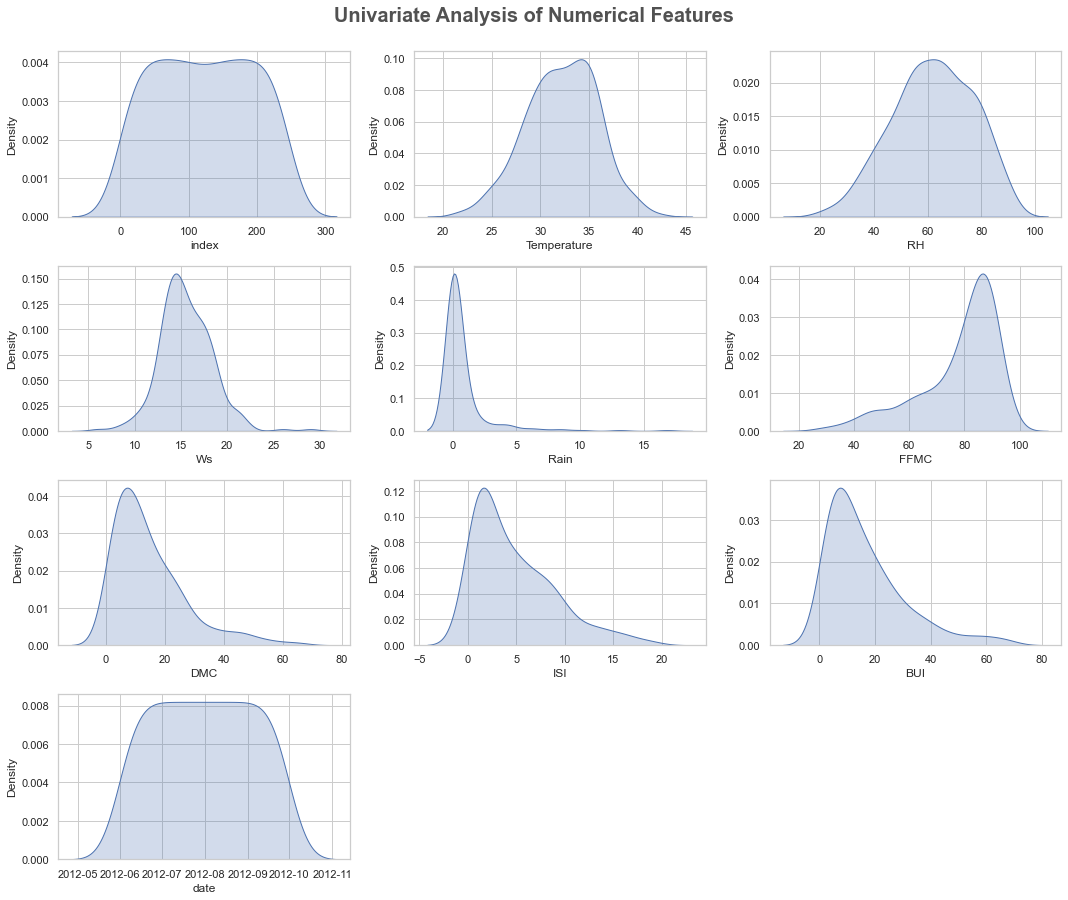

In [275]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(col_num)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df_new[col_num[i]], shade=True, color='b')
    plt.xlabel(col_num[i])
    plt.tight_layout()

#### Observations :
- Rain, DMC, DC, ISI, BUI, FWI are Right Skewed or Positively Skewed.
- FFMC is Left Skewed or Negatively Skewed.
- Ws is slightly Right Skewed
- RH is slightly Left skewed
- In Rain, FMCC, DMC, DC, ISI, FWI features there are more outliers

### Scatter plot to see the trend in each numerical columns

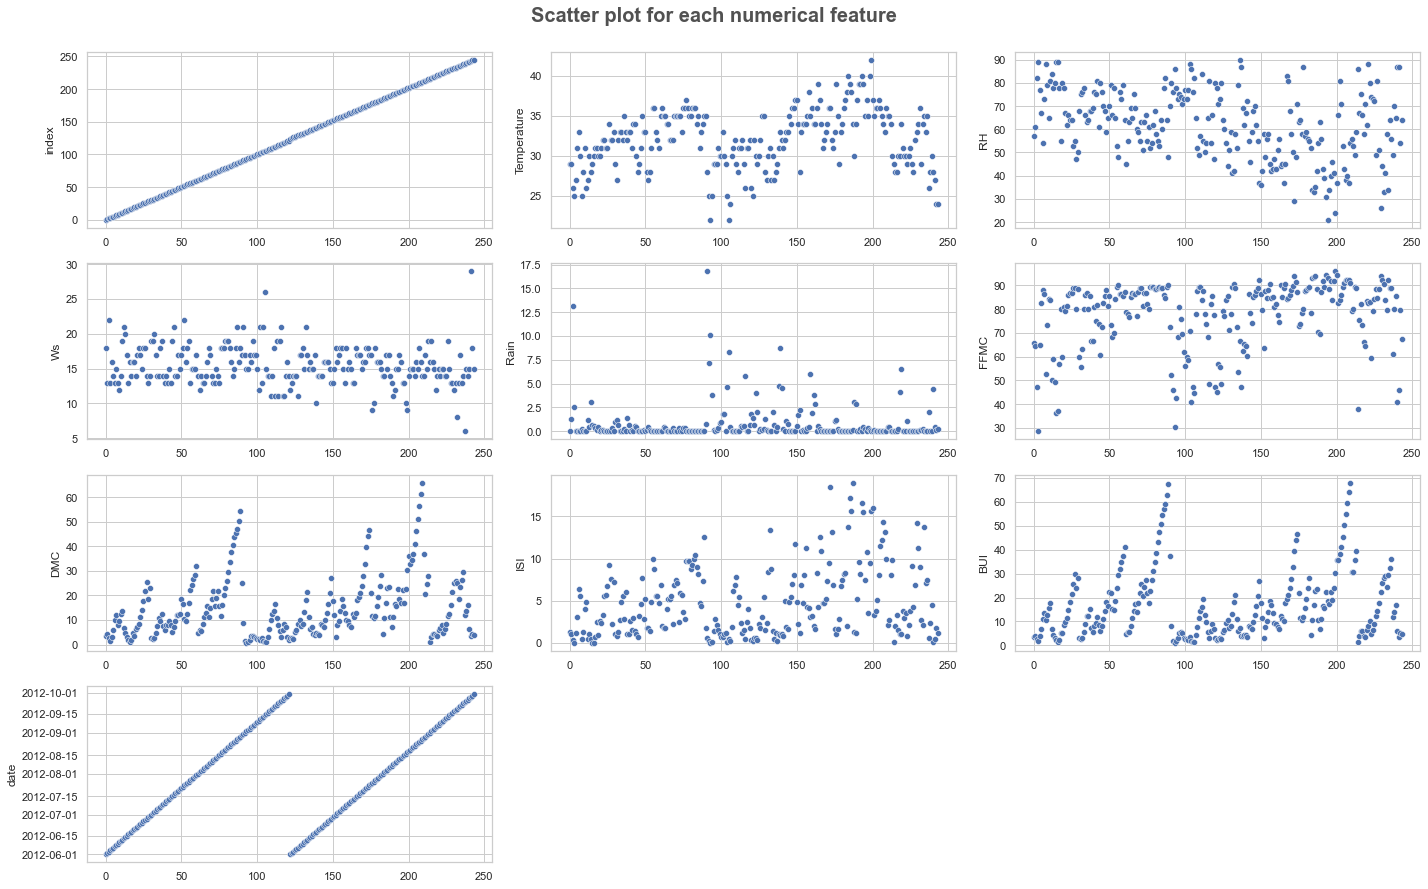

In [276]:
plt.figure(figsize=(20,15))
plt.suptitle('Scatter plot for each numerical feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(col_num)):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(y=col_num[i], x=df_new.index, data=df_new)
    plt.tight_layout()

#### Categorical Features

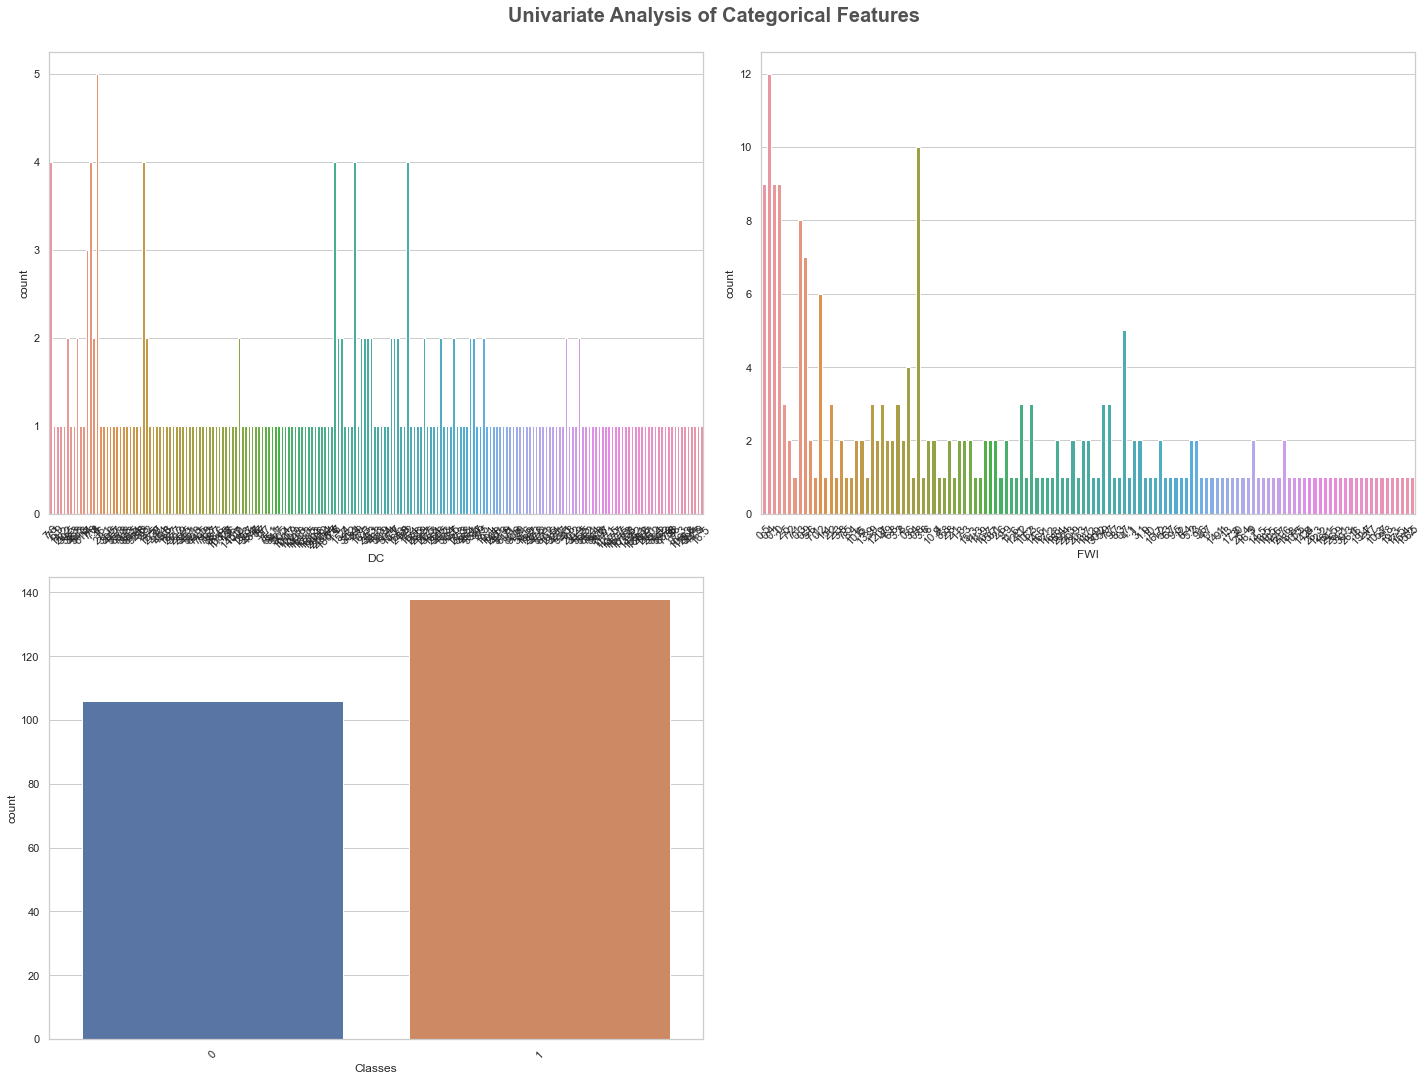

In [277]:
plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = ['DC', 'FWI', 'Classes']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df_new[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Bivariate Analysis
- Bivariate analysis is the analysis of two variables to find out relationship between them.

## Multivariate Analysis
- Multivariate analysis is the analysis of more than one variable.

Plots
- stripplot (categorical vs numerical)
- scatterplot/pairplot (numerical vs numerical) (check correlation)
- boxplot (outliers)
- heatmap (correlation)
- Lineplot (trend in numerical feature with time)

### Check Multicollinearity in Numerical features

In [278]:
df_new[list(df_new[col_num].columns)].corr()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI
index,1.000000,0.219836,-0.380075,-0.168174,-0.032159,0.229225,0.258296,0.283883,0.179746
Temperature,0.219836,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.607551,0.455504
RH,-0.380075,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.690637,-0.348587
Ws,-0.168174,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.015248,0.029756
Rain,-0.032159,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.347105,-0.299171
FFMC,0.229225,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.739730,0.589652
DMC,0.258296,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.674499,0.982073
ISI,0.283883,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,1.000000,0.635891
BUI,0.179746,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.635891,1.000000


Heatmap  :  Correlation between features

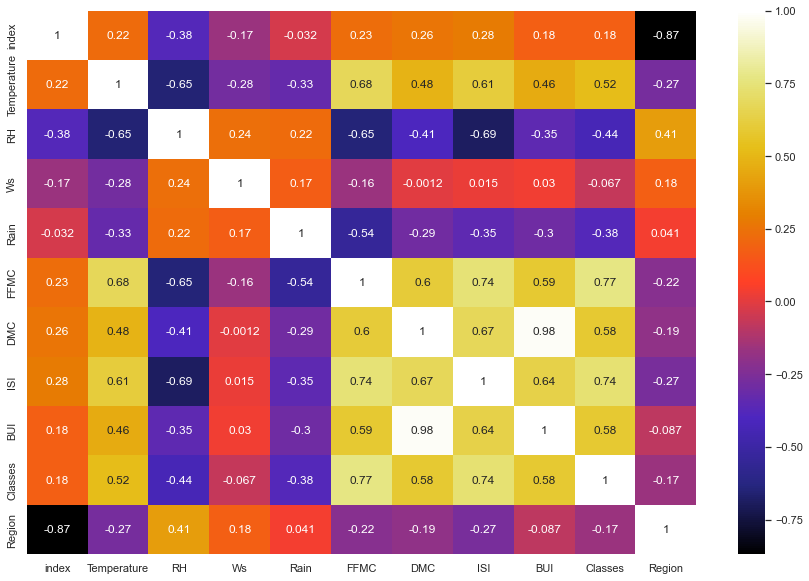

In [279]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_new.corr(), cmap='CMRmap', annot=True)
plt.show()

Observation : 
- Highly +ve correlation between DMC & BMI
- Highly -ve correlation between RH & ISI, RH & FMCC, RH & Temperature

Stripplot  :  To see relationship between numerical features and target

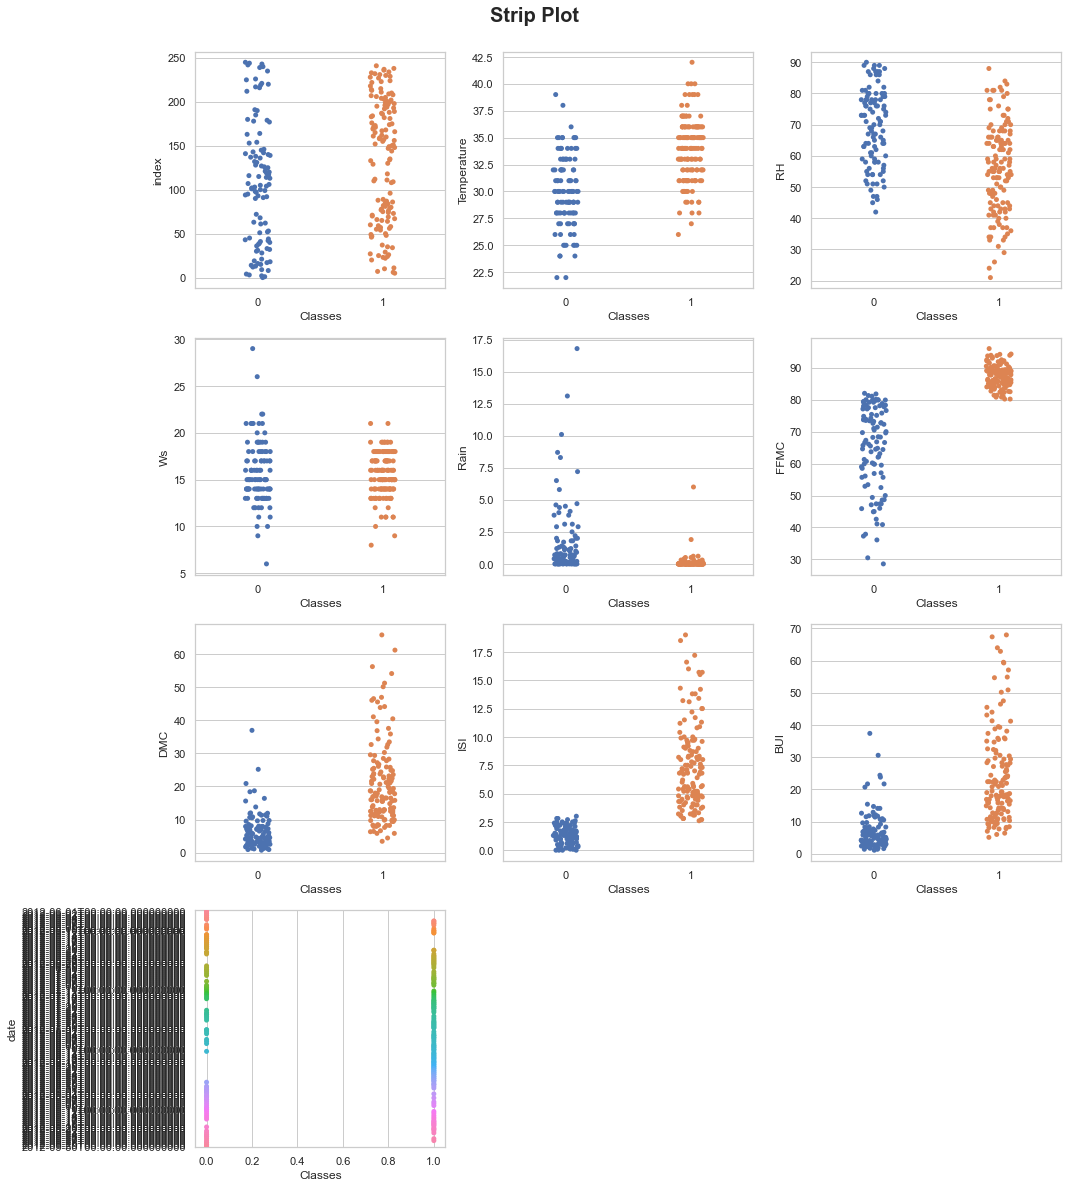

In [280]:
plt.figure(figsize=(15, 20))
plt.suptitle('Strip Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(col_num)):
    plt.subplot(5, 3, i+1)
    sns.stripplot(y=col_num[i], x='Classes', data=df_new)
    plt.tight_layout()

Observations :
- Note : 0-> Not Fire, 1-> Fire
- Places with higher temperature has fire
- Places with low humidity has fire
- Places with rain < 1.5  has fire
- Places with FFMC > 80 has fire
- Places with ISI > 2.5 has fire
- Places with BUI > 8 has fire

Box Plot  : To find outliers in the features

<AxesSubplot:>

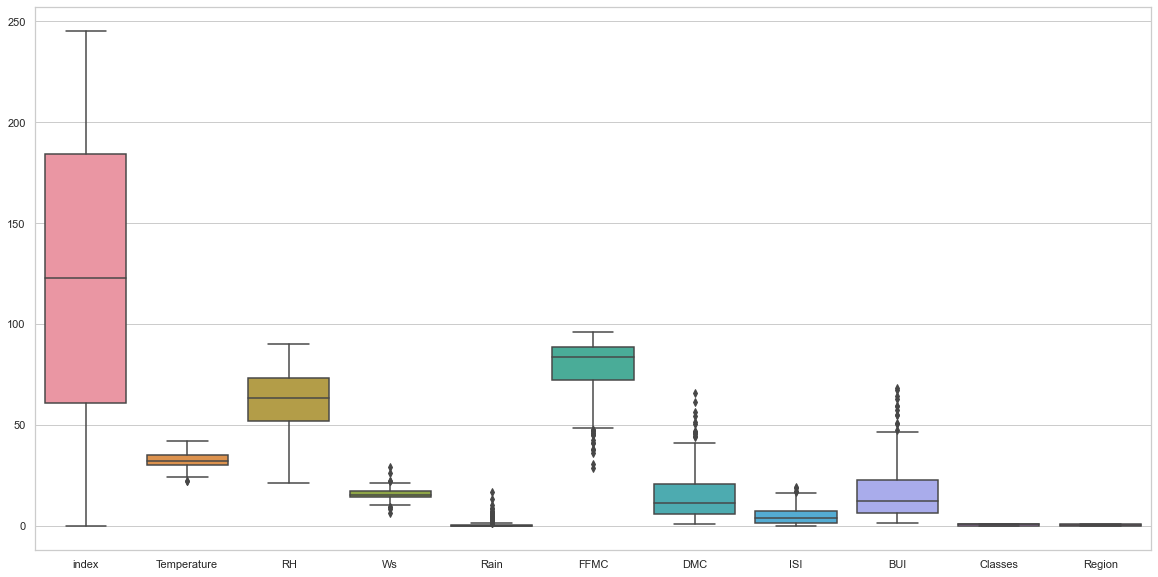

In [281]:
plt.figure(figsize=(20,10))
sns.boxplot(data = df_new, orient='v')

Observation :
- FFMC, DMC, BUI Rain has more outliers
- Ws, ISI, Temprature have outliers too

## 4.2 Statistical Analysis

In [282]:
df_new.describe()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes,Region
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,122.500000,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754,0.565574,0.500000
std,71.450492,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824,0.496700,0.501028
min,0.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.000000,0.000000
25%,60.750000,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000,0.000000,0.000000
50%,122.500000,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000,1.000000,0.500000
75%,184.250000,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000,1.000000,1.000000
max,245.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,1.000000,1.000000


Observation :
- describe() returns Statistical Summary of all the numerical features
- It returns functions : count(), mean(), std(), min(), max(), 25%(), 50%(), 75%()

## 4.3 Graphical Analysis

### Area having more fire ?

<AxesSubplot:xlabel='Region', ylabel='Classes'>

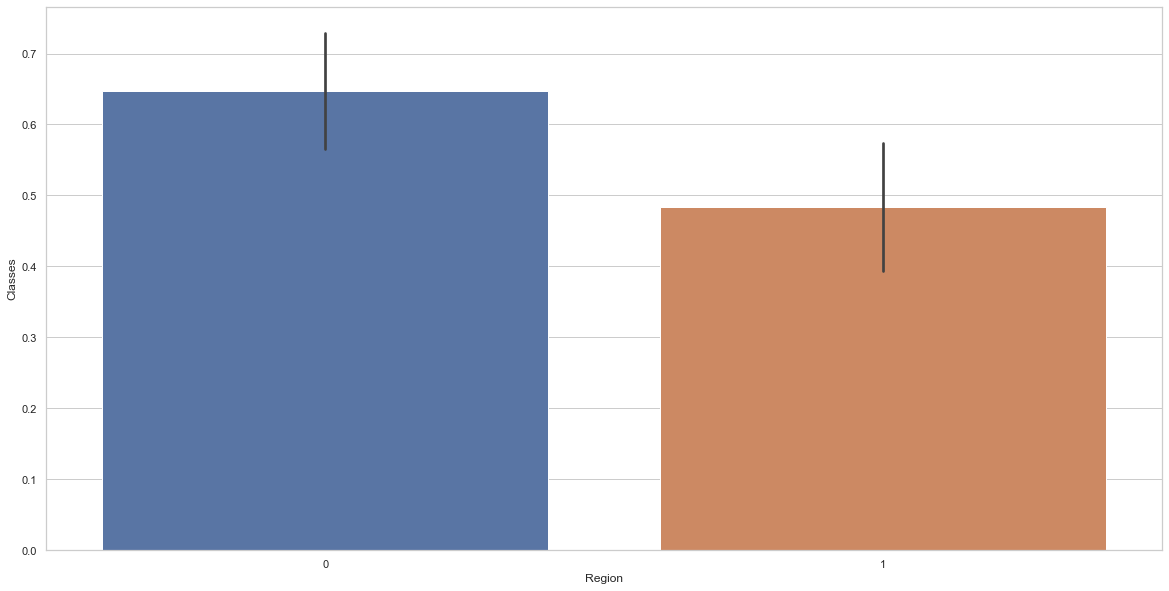

In [283]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

sns.barplot(x='Region', y='Classes', data=df_new)

Observations :
- Sidi-Bel-Abbes ragion has more number of times fire took place

### Consistent Temperature in places

Text(0.5, 0, 'Temperature')

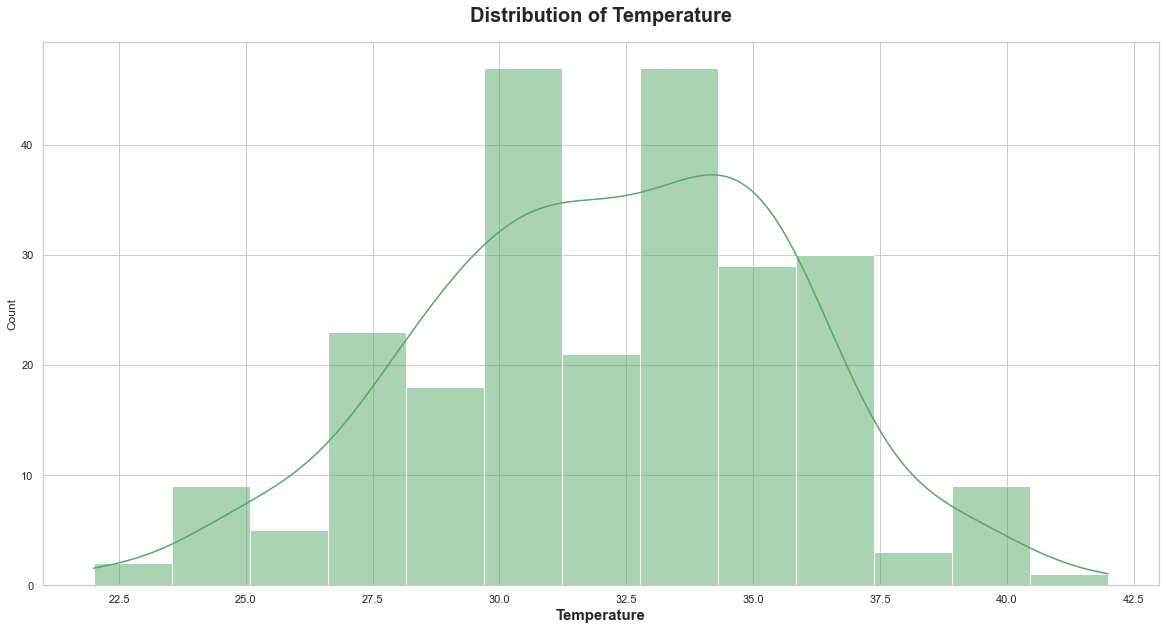

In [284]:
plt.subplots(figsize=(20,10))
sns.histplot("Distribution of Temperature", x=df_new.Temperature, color='g', kde=True)
plt.title("Distribution of Temperature", weight='bold', fontsize=20, pad=20)
plt.xlabel('Temperature', weight='bold', fontsize=15)

Observation :
- The frequent occurring temperature ranges between 30-34

## Highest Temperature recorded
Bar Plot

<AxesSubplot:xlabel='Temperature', ylabel='Classes'>

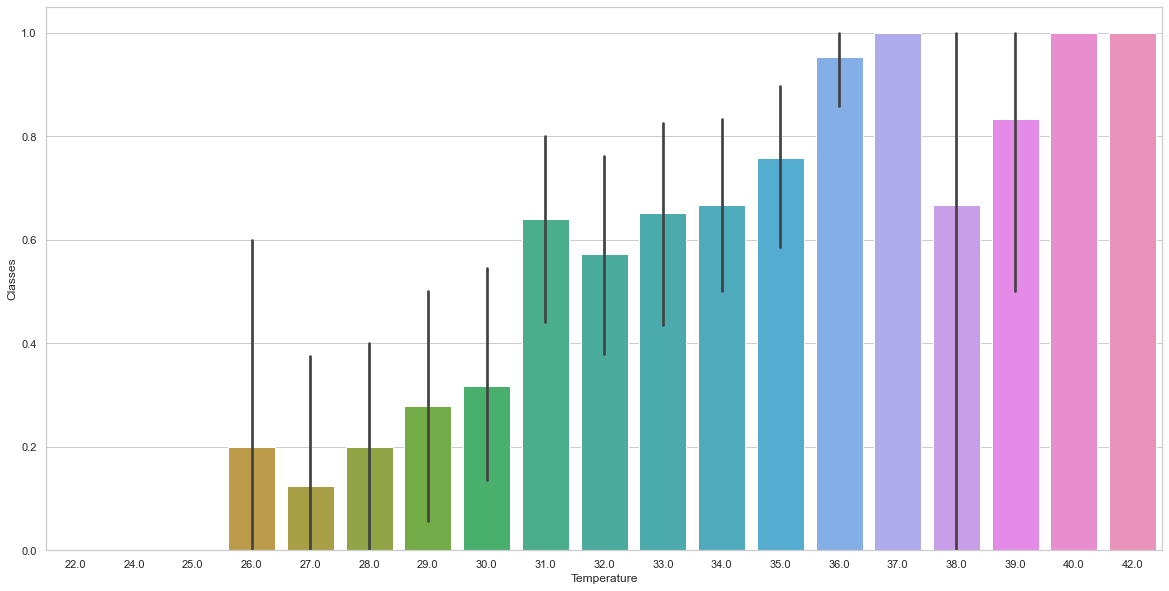

In [285]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

sns.barplot(x='Temperature', y='Classes', data=df_new)

Observations :
- Highest Temperature is 37, 40, 42

## The Region with more Rain

<AxesSubplot:xlabel='Region', ylabel='Rain'>

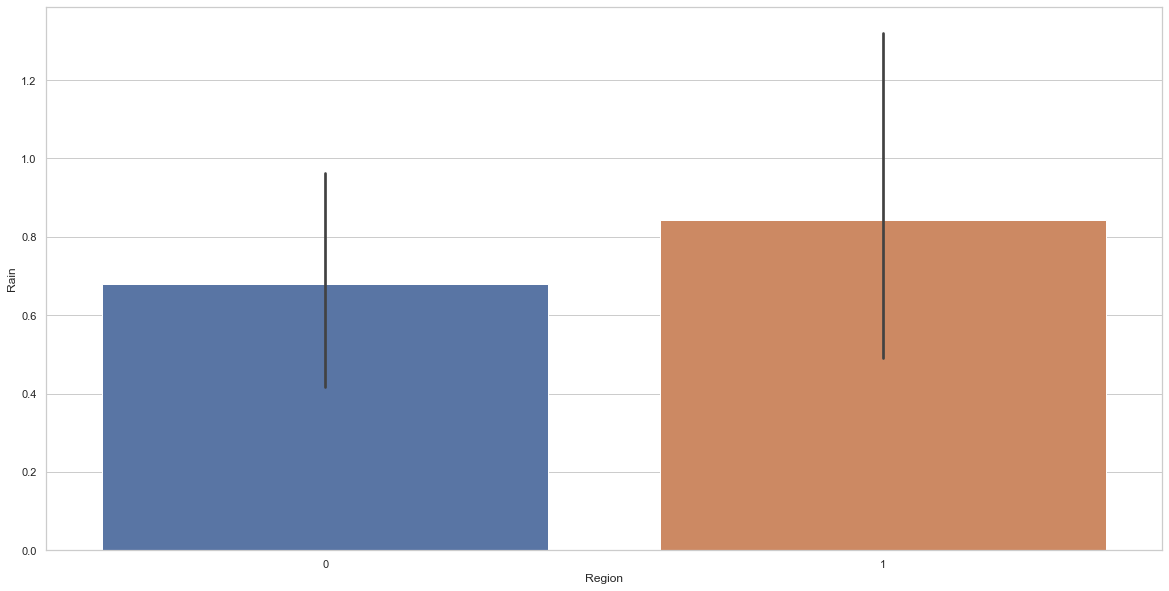

In [286]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
sns.barplot(x='Region', y='Rain', data=df_new)

Observation :
- Bejaia is the region with more Rain

### Box plot : Classes Vs Temerature

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

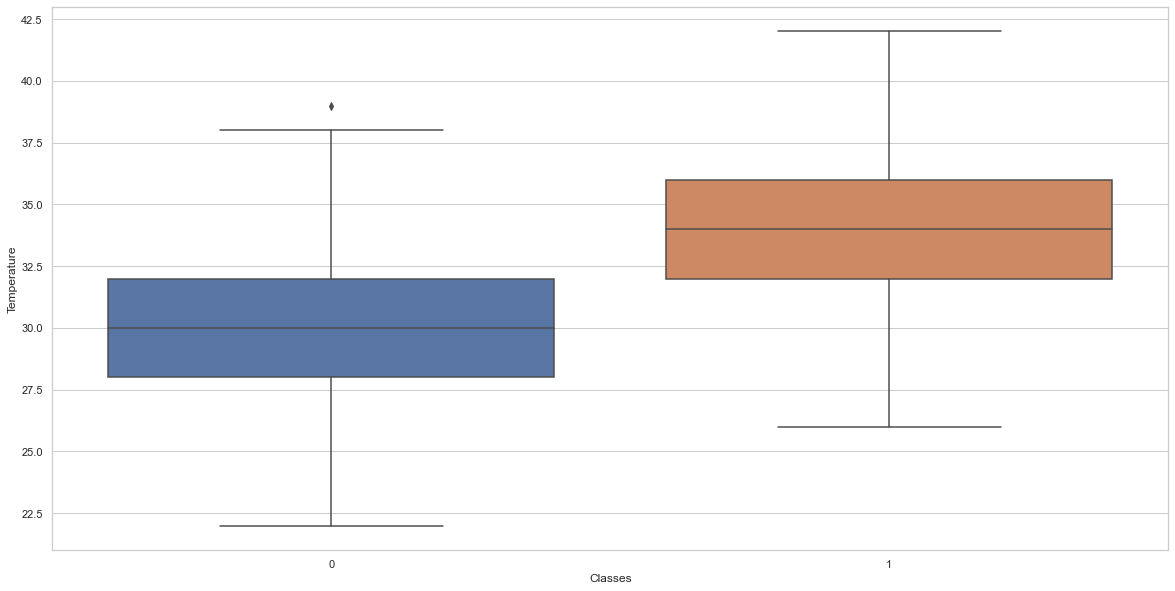

In [287]:
# Box-plot using inbuilt dataset

# importing the required module : seaborn
import seaborn

# Setting the background of the plot
seaborn.set(style='whitegrid')

# Loading Dataset
seaborn.boxplot(x='Classes', y='Temperature', data=df_new)

Observation :
- There is outlier on 'No Fire' plot. 

### Box plot : Classes vs Rain

<AxesSubplot:xlabel='Classes', ylabel='Rain'>

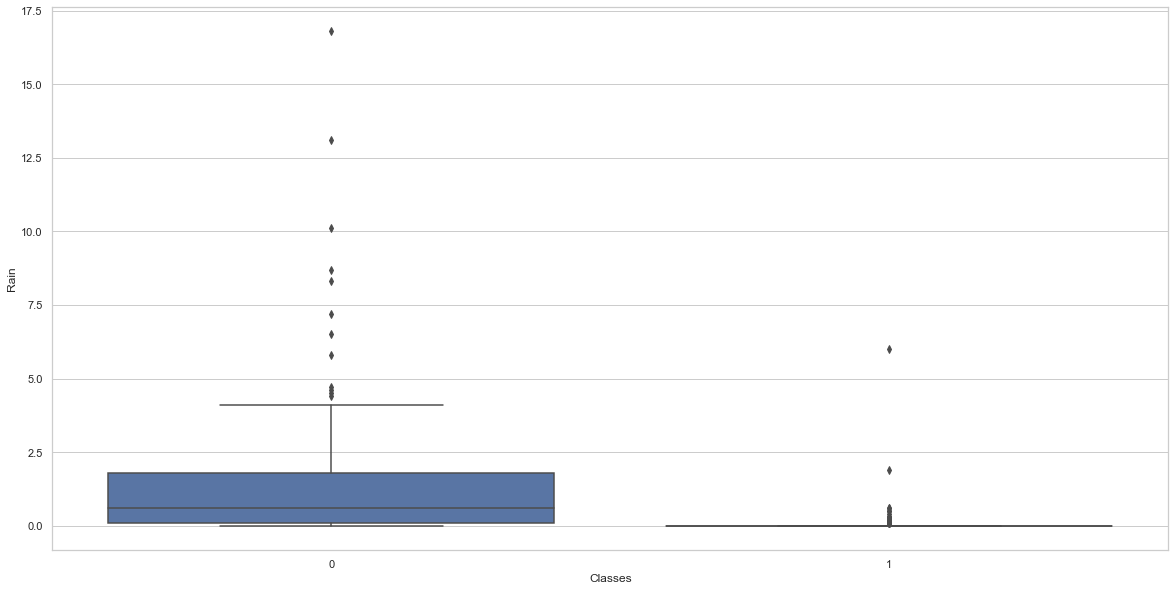

In [288]:
# Python program to illustrate
# Boxplot using inbuilt dataset


# importing the required module
import seaborn

# Python program to illustrate
# Boxplot using inbuilt dataset

# Given in seaborn

# importing the required module
import seaborn

# setting background of the plot
seaborn.set(style='whitegrid')

# Loading dataset
seaborn.boxplot(x='Classes', y='Rain', data=df_new)

Observations :
- There are days with Rain where Fire in the forest

#### Box Plot : Numerical  features

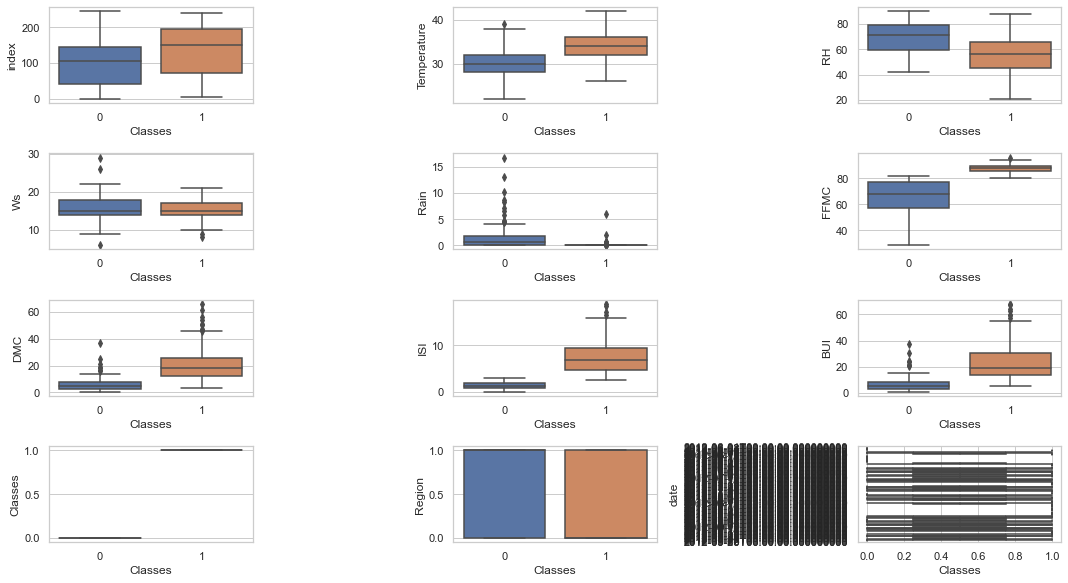

In [301]:
plt.figure(figsize=(15, 20))

for i in range(0, len(col_num)):
    ax = plt.subplot(10, 3, i+1)
    sns.boxplot(data=df_new, x='Classes', y=df_new[col_num[i]])
    plt.tight_layout()

Observation :
- 'Not Fire' plot has outliers 